In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from geopandas import GeoDataFrame

In [3]:
zuzycieEnergii_2019 = pd.read_excel("./Zużycie energii elektrycznej_2019.xlsx", index_col = 'Zużycie energii elektrycznej_2019')
wartosci2019 = zuzycieEnergii_2019.iloc[0]
wartosci2019 = pd.DataFrame(wartosci2019)
wartosci2019 = wartosci2019[0:-1]
wartosci2019.reset_index(inplace=True)
wartosci2019.rename(columns={'index' : 'Województwa'}, inplace=True)

lista = ['śląskie', 'opolskie', 'świętokrzyskie', 'pomorskie', 'podlaskie', 'zachodniopomorskie', 'dolnośląskie',
     'wielkopolskie', 'podkarpackie', 'małopolskie', 'warmińsko-mazurskie', 'łódzkie', 'mazowieckie', 'kujawsko-pomorskie',
     'lubelskie', 'lubuskie']

mapa_woj = gpd.read_file('./wojewodztwa.shx')
nazwy = pd.DataFrame(lista, columns = ['Województwa'])
geo = nazwy.join(mapa_woj)
dane = geo.merge(wartosci2019, on = 'Województwa')

ludnosc = [4533565, 986506, 1241546, 2333523, 1181533, 1701030, 2901225, 3493969, 2129015, 3400577, 1428983, 
          2466322, 5403412, 2077775, 2117619, 1014548]

dane_na_osobe = []

for i in range(len(dane['Zużycie ogółem'])):
    dane_na_osobe.append(round(((dane['Zużycie ogółem'][i]/ludnosc[i])*1000000),2))
    
zuzycie_na_osobe = pd.DataFrame(dane_na_osobe)
zuzycie_na_osobe.rename(columns = {0 : 'Zużycie na osobę'}, inplace=True)

dane = dane.join(zuzycie_na_osobe)
dane = GeoDataFrame(dane)
dane.rename(columns = {'Zużycie ogółem' : 'Zużycie ogółem [GWh]' , 
                       'Zużycie na osobę' : 'Zużycie na osobę [KWh]'}, inplace=True)
dane

Województwa                                           geometry  \
0               śląskie  MULTIPOLYGON (((494179.526 358814.295, 494173....   
1              opolskie  POLYGON ((417001.841 369554.248, 417005.901 36...   
2        świętokrzyskie  POLYGON ((549668.108 320839.847, 549676.668 32...   
3             pomorskie  POLYGON ((414159.332 769636.478, 414269.395 76...   
4             podlaskie  POLYGON ((700075.252 572284.982, 700055.491 57...   
5    zachodniopomorskie  POLYGON ((225874.333 694332.554, 231446.660 69...   
6          dolnośląskie  POLYGON ((229358.510 402830.704, 229362.963 40...   
7         wielkopolskie  POLYGON ((347736.460 606210.458, 347736.779 60...   
8          podkarpackie  POLYGON ((713790.986 331036.437, 713798.945 33...   
9           małopolskie  POLYGON ((568911.289 294804.269, 568909.081 29...   
10  warmińsko-mazurskie  POLYGON ((666395.390 720617.696, 666399.706 72...   
11              łódzkie  POLYGON ((569440.120 369049.127, 569457.747 36...   
12          mazowieckie  POLYGON ((700396.155 572145.561, 700403.968 57...   
13   kujawsko-pomorskie  POLYGON ((411073.728 634866.912, 411075.110 63...   
14            lubelskie  POLYGON ((681015.792 420027.270, 681441.239 42...   
15             lubuskie  POLYGON ((229358.510 402830.704, 229349.109 40...   

   Zużycie ogółem [GWh]  Zużycie na osobę [KWh]  
0                 25967                 5727.72  
1                  5552                 5627.94  
2                  5124                 4127.11  
3                  8066                 3456.58  
4                  3225                 2729.50  
5                  6019                 3538.44  
6                 14306                 4931.02  
7                 12799                 3663.17  
8                  5522                 2593.69  
9                 13338                 3922.28  
10                 3961                 2771.90  
11                13361                 5417.38  
12                25348                 4691.11  
13                 8397                 4041.34  
14                 6050                 2856.98  
15                 3940                 3883.50

In [21]:
lista_zużycia = []

for i in range(16):
    lista_zużycia.append(dane['Zużycie na osobę [KWh]'][i])

maximum = max(lista_zużycia)
minimum = min(lista_zużycia)

index_max = lista_zużycia.index(maximum)
maximum_Nazwa_Woj = dane['Województwa'][index_max]
index_min = lista_zużycia.index(minimum)
minimum_Nazwa_Woj = dane['Województwa'][index_min]

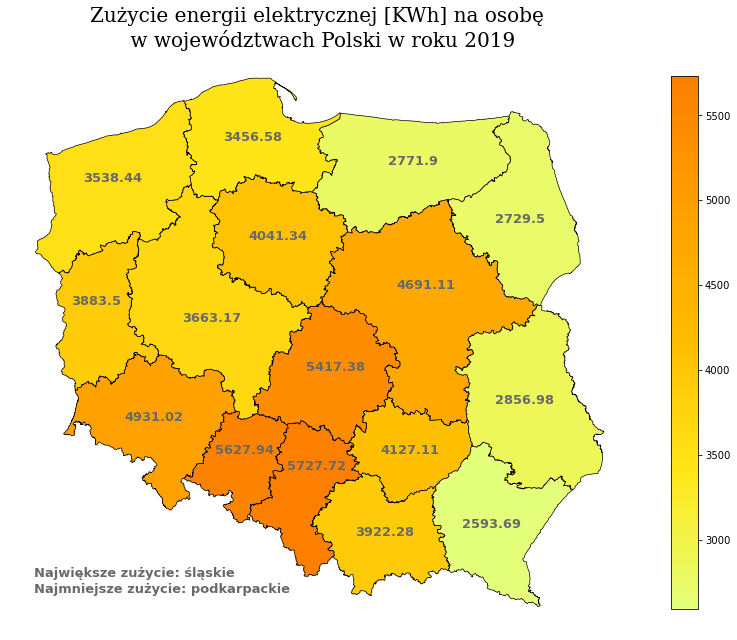

In [23]:
tytul = {'family':'serif','color':'black','size':20}
fig, ax = plt.subplots(1, figsize=(14,14))
dane.plot(ax=ax, column = 'Zużycie na osobę [KWh]', cmap='Wistia', linewidth=0.7, edgecolor='k', legend = True,
         legend_kwds={'shrink': 0.7})
ax.annotate(text = ('Największe zużycie: ' + str(maximum_Nazwa_Woj)), xy=(170000, 170000), 
            size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = ('Najmniejsze zużycie: ' + str(minimum_Nazwa_Woj)), xy=(170000, 150000), 
            size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][0], xy=(477000, 300000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][1], xy=(390000, 320000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][2], xy=(590000, 320000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][3], xy=(400000, 700000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][4], xy=(730000, 600000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][5], xy=(230000, 650000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][6], xy=(280000, 360000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][7], xy=(350000, 480000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][8], xy=(690000, 230000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][9], xy=(560000, 220000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][10], xy=(600000, 670000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][11], xy=(500000, 420000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][12], xy=(610000, 520000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][13], xy=(430000, 580000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][14], xy=(730000,380000), size = 13, color = 'dimgrey', weight = 'bold')
ax.annotate(text = dane['Zużycie na osobę [KWh]'][15], xy=(215000,500000), size = 13, color = 'dimgrey', weight = 'bold')
plt.title('Zużycie energii elektrycznej [KWh] na osobę \n w województwach Polski w roku 2019', fontdict=tytul)
ax.axis('off')
plt.savefig('Mapa_Polski_2019.jpg')
plt.show()